In [1]:
from google.colab import files
files.upload()

Saving 1 (1).jpeg to 1 (1).jpeg


{'1 (1).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00\x80Exif\x00\x00II*\x00\x08\x00\x00\x00\x04\x001\x01\x02\x00\x07\x00\x00\x00>\x00\x00\x00;\x01\x02\x00\x08\x00\x00\x00E\x00\x00\x00\x12\x02\x03\x00\x02\x00\x00\x00\x02\x00\x02\x00i\x87\x04\x00\x01\x00\x00\x00N\x00\x00\x00\x00\x00\x00\x00Google\x00unknown\x00\x00\x03\x00\x00\x90\x07\x00\x04\x00\x00\x000220\x02\xa0\x04\x00\x01\x00\x00\x00*\x04\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00@\x06\x00\x00\x00\x00\x00\x00\xff\xdb\x00\x84\x00\x03\x02\x02\n\n\n\n\n\n\n\n\n\n\n\n\x08\x08\x08\x08\n\x08\x08\x08\x08\n\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\n\x08\x08\x08\x08\n\n\n\x08\x08\x0b\r\n\x08\r\x08\x08\t\x08\x01\x03\x04\x04\x06\x05\x06\n\x06\x06\n\r\r\x0c\r\r\x0c\r\r\r\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\

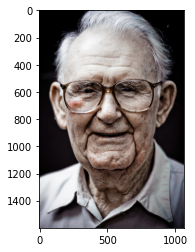

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('1 (1).jpeg')
imgplot = plt.imshow(img)

Age
3670
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
92/92 [==============================] - 102s 1s/step - loss: 1.4616 - accuracy: 0.4087 - val_loss: 1.1359 - val_accuracy: 0.5477
This image most likely belongs to sunflowers with a 75.09 percent confidence.


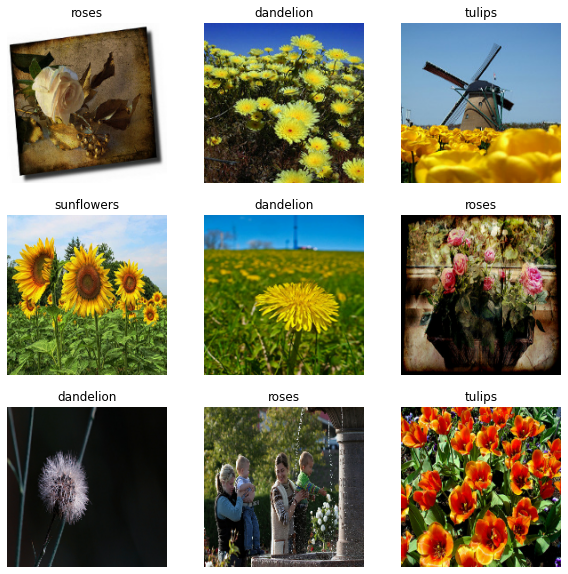

In [39]:
class image_classification:

    def __init__(self,target):
        self.target = target
        self.batch_size = 32
        self.img_height = 180
        self.img_width = 180

    def get_data(self):
        import tensorflow as tf
        import pathlib
        dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
        data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
        data_dir = pathlib.Path(data_dir)
        print(self.target)
        return data_dir

    def EDA(self,data_dir):
        import PIL
        image_count = len(list(data_dir.glob('*/*.jpg')))
        roses = list(data_dir.glob('roses/*'))
        PIL.Image.open(str(roses[0]))
        print(image_count)

    def train_data(self):
        import tensorflow as tf
        train_ds = tf.keras.utils.image_dataset_from_directory(
                        data_dir,
                        validation_split=0.2,
                        subset="training",
                        seed=123,
                        image_size=(self.img_height, self.img_width),
                        batch_size=self.batch_size)
        return train_ds
        
    def val_data(self):
        import tensorflow as tf
        val_ds = tf.keras.utils.image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="validation",
                  seed=123,
                  image_size=(self.img_height, self.img_width),
                  batch_size=self.batch_size)
        return val_ds
        
    def plot_imgs(self):
        import matplotlib.pyplot as plt
        class_names = train_ds.class_names
        print(class_names)
        plt.figure(figsize=(10, 10))
        for images, labels in train_ds.take(1):
          for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
        return class_names

    def model(self):
        import tensorflow as tf
        from tensorflow import keras
        from tensorflow.keras import layers
        from tensorflow.keras.models import Sequential
        num_classes = len(class_names)

        model = Sequential([
          layers.Rescaling(1./255, input_shape=(self.img_height, self.img_width, 3)),
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(num_classes)
        ])
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        return model

    def train_model(self,model):
      epochs=1
      history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs)
      
    def test_model(self,model):
      import tensorflow as tf
      import numpy as np
      sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
      sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

      img = tf.keras.utils.load_img(
          sunflower_path, target_size=(self.img_height, self.img_width)
      )
      img_array = tf.keras.utils.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])
      print(
          "This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))

if __name__ == "__main__":
    a = image_classification('Age')
    data_dir = a.get_data()
    a.EDA(data_dir)
    train_ds = a.train_data()
    val_ds = a.val_data()
    class_names = a.plot_imgs()
    model = a.model()
    a.train_model(model)
    a.test_model(model)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')